# ML-Basic-2024. Дунай А.А.
# Проектная работа: Исследование данных о кибератаках

## Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Загрузим датасет

In [2]:
df = pd.read_csv("cybersecurity_attacks.csv")

In [3]:
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,40000.0,32970.356450,18560.425604,1027.0,16850.75,32856.000,48928.25,65530.0
Destination Port,40000.0,33150.868650,18574.668842,1024.0,17094.75,33004.500,49287.00,65535.0
Packet Length,40000.0,781.452725,416.044192,64.0,420.00,782.000,1143.00,1500.0
Anomaly Scores,40000.0,50.113473,28.853598,0.0,25.15,50.345,75.03,100.0


In [8]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [9]:
df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Source IP Address             0
Destination IP Address        0
Source Port                   0
Timestamp                     0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Attack Type                   0
Payload Data                  0
Anomaly Scores                0
Severity Level                0
Action Taken                  0
Attack Signature              0
User Information              0
Geo-location Data             0
Network Segment               0
Device Information            0
Log Source                    0
dtype: int64

In [10]:
df.isnull().sum() / len(df) * 100

Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators        50.0000
Anomaly Scores             0.0000
Alerts/Warnings           50.1675
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts            50.1250
Log Source                 0.0000
dtype: float64

In [11]:
df[['Alerts/Warnings', 'IDS/IPS Alerts', 'Malware Indicators', 'Firewall Logs']].nunique()

Alerts/Warnings       1
IDS/IPS Alerts        1
Malware Indicators    1
Firewall Logs         1
dtype: int64

In [12]:
# Все эти признаки можно отнести к категориальным 
# Alerts/Warnings 
# IDS/IPS Alerts 
# Malware Indicators 
# Firewall Logs 
# Proxy Information
df.loc[:,:] = df.fillna('No')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [13]:
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [14]:
df.isnull().sum().sort_values(ascending=False)

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [15]:
df['Device Information'].value_counts()

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                                       35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                                           34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                                           33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                                       31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                                       31
                                                                                                                                                      ..
Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_8 like Mac OS X) AppleW

In [16]:
df['Browser'] = df['Device Information'].str.split('/').str[0]
df['Browser']

0        Mozilla
1        Mozilla
2        Mozilla
3        Mozilla
4        Mozilla
          ...   
39995    Mozilla
39996    Mozilla
39997    Mozilla
39998    Mozilla
39999    Mozilla
Name: Browser, Length: 40000, dtype: object

In [17]:
df['Browser'].value_counts()

Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64

In [18]:
import re
# OS and device patterns to search for
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I makes the search case-insensitive
        if match:
            return match.group()
    return 'Unknown'  # Return 'Unknown' if no patterns match

# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

In [19]:
df['Device/OS'].value_counts()

Device/OS
Windows      17953
Linux         8840
Macintosh     5813
iPod          2656
Android       1620
iPhone        1567
iPad          1551
Name: count, dtype: int64

In [20]:
df.isnull().sum().sort_values(ascending=False)

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
Browser                   0
Device/OS                 0
dtype: int64

In [21]:
df = df.drop('Device Information', axis = 1)

In [30]:
#Number of Attacks per year
df[Timestamp] = pd.to_datetime(df[Timestamp])
df['Year']=df['Timestamp'].dt.year
df['Month']=df['Timestamp'].dt.month
# Group by YEAR and ATTACK TYPE, count occurrences
attack_counts = df.groupby(['Year','Month', 'Attack Type']).size().unstack(fill_value=0)

# Print a summary of the data
print("Summary of the No.of Attacks Month wise\n",attack_counts)

# Plot the data
ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Number of Attacks per Month by Attack Type')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Show the plot
plt.show()



NameError: name 'Timestamp' is not defined

In [49]:
#Number of Attacks per year
df['Year']=df['Timestamp'].dt.year
# Group by YEAR and ATTACK TYPE, count occurrences
attack_counts = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

# Print a summary of the data
print("Summary of the No.of Attacks Year wise\n",attack_counts)

# Plot the data
ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Show the plot
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [23]:
df.nunique()

Timestamp                 39997
Source IP Address         40000
Destination IP Address    40000
Source Port               29761
Destination Port          29895
Protocol                      3
Packet Length              1437
Packet Type                   2
Traffic Type                  3
Payload Data              40000
Malware Indicators            2
Anomaly Scores             9826
Alerts/Warnings               2
Attack Type                   3
Attack Signature              2
Action Taken                  3
Severity Level                3
User Information          32389
Network Segment               3
Geo-location Data          8723
Proxy Information         20149
Firewall Logs                 2
IDS/IPS Alerts                2
Log Source                    2
Browser                       2
Device/OS                     7
dtype: int64

''' Категориальные признак 
Protocol
Traffic Type
Attack Type
Action Taken 
Severity Level
Network Segment
Device/OS
'''

'''
Бинарные признаки
Packet Type 
Malware Indicators
Alerts/Warnings
Attack Signature
Firewall Logs
IDS/IPS Alerts
Log Source
Browser
'''

'''
Числовые признаки
Timestamp


'''


In [24]:
df.dtypes.value_counts()

object     22
int64       3
float64     1
Name: count, dtype: int64

In [51]:
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
Browser                   0
Device/OS                 0
dtype: int64

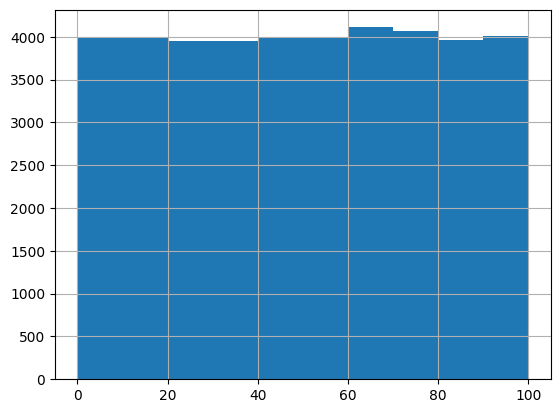

In [62]:
df["Anomaly Scores"].hist();

In [25]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information', 'Network Segment',
       'Geo-location Data', 'Proxy Information', 'Firewall Logs',
       'IDS/IPS Alerts', 'Log Source', 'Browser', 'Device/OS'],
      dtype='object')

In [74]:
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [ ]:


X= df [categorical_features + numerical_features]
y= df['Anomaly Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)